# Import python libs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.linear_model import RANSACRegressor

from sklearn.preprocessing import PolynomialFeatures

# Linear Regression with simulated data points with noise

In [2]:
def simulate_points(a, b, max_noise):
    x = np.linspace(-2, 3, 15) # the hyperparameters (β0, β1)
    y = a + b * x # the predicted value (y = β0 + β1 * x)
    y_noise = np.random.uniform(-max_noise, max_noise, len(x))
    y += y_noise
    return [x, y]

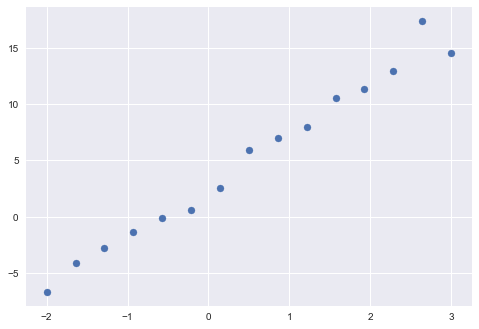

In [3]:
points = simulate_points(2, 5, 2.5)
plt.scatter(points[0], points[1]) # visualize points
plt.show()

[ 4.59104522] 2.75529126057


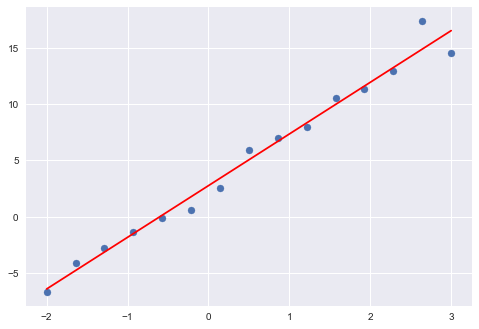

In [4]:
model = LinearRegression()
x = points[0].reshape(-1, 1)
model.fit(x, points[1]) # train the model with data and result
y_predicted = model.predict(x) # predict y for every x

plt.scatter(points[0], points[1]) # visualize real values
plt.plot(points[0], y_predicted, color = "red") # visualize predicted values

print(model.coef_, model.intercept_)

# Linear Regression with real data

In [5]:
housing = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)
housing.columns = ["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance", "highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]
print(housing.shape)
housing.head() # shows the first five rows

(506, 14)


,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
housing.corr() # correlations matrix

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
crime_rate,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
zoned_land,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industry,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
bounds_river,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox_conc,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
highways,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
tax,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


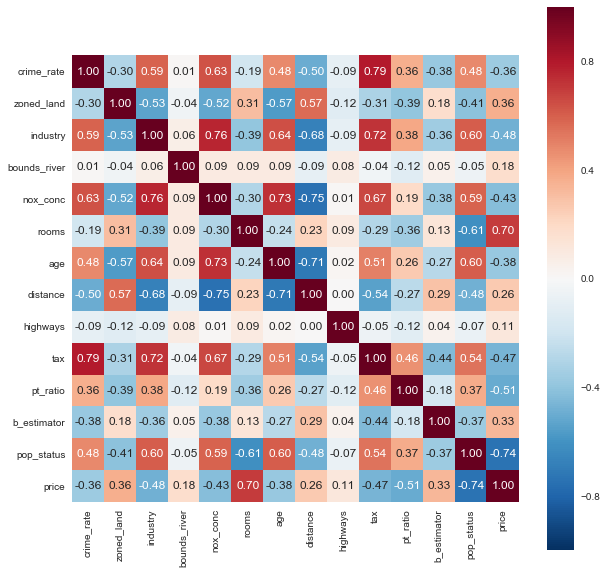

In [7]:
plt.figure(figsize = (10, 10))
sns.heatmap(housing.corr(), annot = True, fmt = ".2f", square = True)
plt.show()

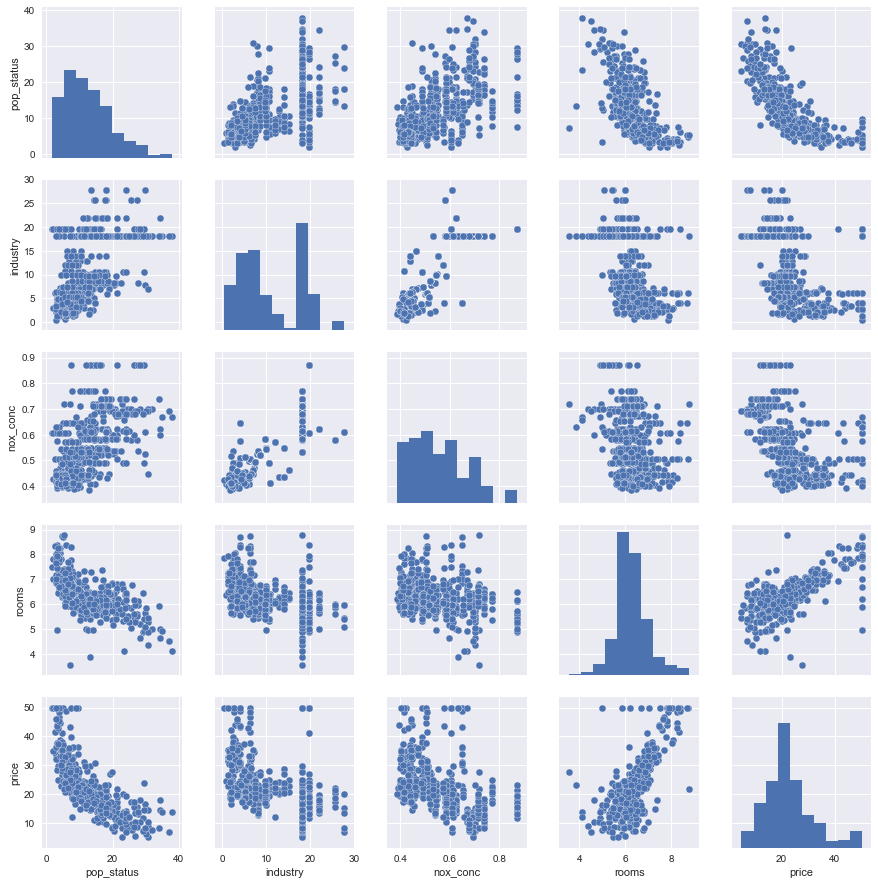

In [8]:
sns.pairplot(housing[["pop_status", "industry", "nox_conc", "rooms", "price"]])

In [9]:
housing_model = LinearRegression()
predictor_attributes = housing.drop("price", axis = 1) # data without result
housing_model.fit(predictor_attributes, housing.price) # train model with data and result
print(housing_model.coef_)
print(housing_model.intercept_)

[  2.09281375e-01   1.49403979e-02   1.27164577e-02   3.00565375e+00
  -1.55234852e+01   4.29955958e+00   2.84848139e-03  -1.08366345e+00
   1.93258621e-01  -2.42034372e-03  -9.65535221e-01   9.43510233e-03
  -5.25242783e-01]
28.3051107501


In [10]:
indices = np.random.randint(0, len(housing), 5) 
houses = housing.ix[indices] # get 5 random houses from the data set
predicted = housing_model.predict(houses.drop("price", axis = 1)) 
print(predicted)
print(houses.price)

[ 17.29152187  33.67450097  23.54226476  18.13706705  16.94979848]
17     17.5
192    36.4
185    29.6
407    27.9
431    14.1
Name: price, dtype: float64


In [11]:
print(r2_score(houses.price, predicted)) # correlation coef

0.558784673458


# Regression with outliers

In [12]:
ransac = RANSACRegressor()
ransac.fit(housing.drop("price", axis = 1), housing.price)
print(ransac.estimator_.coef_, ransac.estimator_.intercept_)

[ -6.42790416e-02  -1.42566260e-02   9.37124184e-03   9.08422640e-01
   3.51550112e+00   4.26398091e+00  -5.28266967e-02  -2.61850767e-01
   3.15634455e-01  -1.78345825e-03  -4.24243833e-01   2.66437904e-03
  -3.02240347e-01] 6.88268884297


In [13]:
predicted = ransac.estimator_.predict(houses.drop("price", axis = 1))
print(r2_score(houses.price, predicted)) # corelation coef

0.162740759826


In [14]:
ransac = RANSACRegressor(LinearRegression(), min_samples = 50, max_trials = 100, residual_threshold = 5.0)

In [15]:
ransac.fit(housing.drop("price", axis = 1), housing.price)
predicted = ransac.estimator_.predict(houses.drop("price", axis = 1))
print(r2_score(houses.price, predicted))

0.139797004488


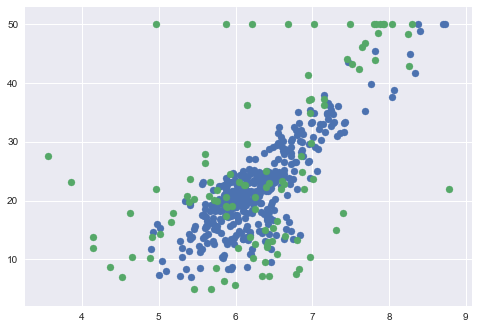

In [16]:
inliers = housing[ransac.inlier_mask_]
outliers = housing[~ransac.inlier_mask_]
plt.scatter(inliers.rooms, inliers.price)
plt.scatter(outliers.rooms, outliers.price)

# Polynomial Regression

In [17]:
x = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)

In [18]:
lin_model = LinearRegression()
quad_model = LinearRegression()
cubic_model = LinearRegression()

lin_model.fit(x, y)
quad_model.fit(quadratic.fit_transform(x), y)
cubic_model.fit(cubic.fit_transform(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

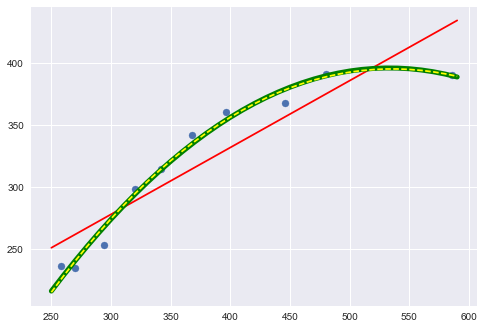

In [19]:
x_test = np.arange(250, 600, 10).reshape(-1, 1)
y_lin_model_predicted = lin_model.predict(x_test)
y_quad_model_predicted = quad_model.predict(quadratic.fit_transform(x_test))
y_cubic_model_predicted = cubic_model.predict(cubic.fit_transform(x_test))

plt.scatter(x, y)
plt.plot(x_test, y_lin_model_predicted, color = "red")
plt.plot(x_test, y_quad_model_predicted, color = "green", linewidth = 5)
plt.plot(x_test, y_cubic_model_predicted, color = "yellow", linestyle = "dashed")